In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [1]:
!pwd

/home/jiwon/football


### Module Load

In [3]:
import numpy as np
import pandas as pd
import warnings
import time
import math
from statistics import math
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import timedelta

from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import log_loss


### Loading Data
- csv파일 읽어오기

In [4]:
train_df = pd.read_csv('./data/train.csv')
test_df = pd.read_csv('./data/test.csv')
train_target_score_df = pd.read_csv('./data/train_target_and_scores.csv')

/tmp/ipykernel_822012/3647375975.py:1: DtypeWarning: Columns (7) have mixed types. Specify dtype option on import or set low_memory=False.
  train_df = pd.read_csv('./data/train.csv')


### EDA

In [5]:
print(train_df.shape)
train_df.head()

(110938, 190)


,id,target,home_team_name,away_team_name,match_date,league_name,league_id,is_cup,home_team_coach_id,away_team_coach_id,...,away_team_history_league_id_1,away_team_history_league_id_2,away_team_history_league_id_3,away_team_history_league_id_4,away_team_history_league_id_5,away_team_history_league_id_6,away_team_history_league_id_7,away_team_history_league_id_8,away_team_history_league_id_9,away_team_history_league_id_10
0,11906497,away,Newell's Old Boys,River Plate,2019-12-01 00:45:00,Superliga,636,False,468196.0,468200.0,...,1122.0,642.0,636.0,636.0,636.0,1122.0,636.0,642.0,636.0,1122.0
1,11984383,home,Real Estelí,Deportivo Las Sabanas,2019-12-01 01:00:00,Primera Division,752,False,516788.0,22169161.0,...,752.0,752.0,752.0,752.0,752.0,752.0,752.0,752.0,752.0,752.0
2,11983301,draw,UPNFM,Marathón,2019-12-01 01:00:00,Liga Nacional,734,False,2510608.0,456313.0,...,734.0,734.0,734.0,734.0,734.0,734.0,734.0,734.0,734.0,734.0
3,11983471,away,León,Morelia,2019-12-01 01:00:00,Liga MX,743,False,1552508.0,465797.0,...,743.0,743.0,743.0,743.0,743.0,743.0,743.0,743.0,746.0,743.0
4,11883005,home,Cobán Imperial,Iztapa,2019-12-01 01:00:00,Liga Nacional,705,False,429958.0,426870.0,...,705.0,705.0,705.0,705.0,705.0,705.0,705.0,705.0,705.0,705.0


In [6]:
print(test_df.shape)
test_df.head()

(72711, 189)


,id,home_team_name,away_team_name,match_date,league_name,league_id,is_cup,home_team_coach_id,away_team_coach_id,home_team_history_match_date_1,...,away_team_history_league_id_1,away_team_history_league_id_2,away_team_history_league_id_3,away_team_history_league_id_4,away_team_history_league_id_5,away_team_history_league_id_6,away_team_history_league_id_7,away_team_history_league_id_8,away_team_history_league_id_9,away_team_history_league_id_10
0,17761448,team home,team away,2021-05-01 00:15:00,Division 1,755,False,9605704.0,30866250.0,2021-04-28 00:30:00,...,755.0,755.0,755.0,755.0,755.0,755.0,755.0,755.0,755.0,755.0
1,17695487,team home,team away,2021-05-01 00:30:00,Liga MX,743,False,10319425.0,460370.0,2021-04-24 02:06:00,...,743.0,743.0,743.0,743.0,743.0,743.0,743.0,743.0,743.0,743.0
2,17715496,team home,team away,2021-05-01 01:00:00,Paulista A2,1314,False,440905.0,220998.0,2021-04-28 23:00:00,...,1314.0,1314.0,1314.0,1314.0,1314.0,1314.0,1314.0,1314.0,1315.0,1315.0
3,17715493,team home,team away,2021-05-01 01:00:00,Paulista A2,1314,False,21036670.0,1553238.0,2021-04-29 01:00:00,...,1314.0,1314.0,1314.0,1314.0,1314.0,1314.0,1314.0,1314.0,1746.0,1746.0
4,17715492,team home,team away,2021-05-01 01:00:00,Paulista A2,1314,False,3618158.0,37400444.0,2021-04-29 01:00:00,...,1314.0,1314.0,1314.0,1314.0,1314.0,1314.0,1314.0,1314.0,1314.0,1314.0


- train : 110938, test : 72711


In [7]:
print(train_target_score_df.shape)
train_target_score_df.head()

(110938, 3)


,id,score,target
0,11906497,2-3,away
1,11984383,1-0,home
2,11983301,2-2,draw
3,11983471,1-2,away
4,11883005,1-0,home


Rating feature의 뜻은 무엇인가?
- The rating features are calculated by Octosport. Ratings are meant to give information on the team's relative strength for a given match. For instance, we would expect that a team with a rating of 10.5 beats a team with a rating of 2.3

Historical columns
- Historical columns contain the key world history and are indexed with numbers from 1 to 10 for the last 10 matches played by the two teams. The number 1 means the most recent while 10 is the oldest. Note that the historical matches can have been played in different leagues. For instance home_team_history_match_date_1 is the date of the last match played by the home team while home_team_history_match_date_2 is two matches ago. Another example, home_team_history_is_play_home_3 tells you if the team played home 3 matches ago and home_team_history_opponent_rating_3 what was the opponent rating.



In [8]:
# train_df.set_index(keys='id',inplace=True)
# test_df.set_index(keys='id',inplace=True)
train_df.head()
print(train_df.shape)


(110938, 190)


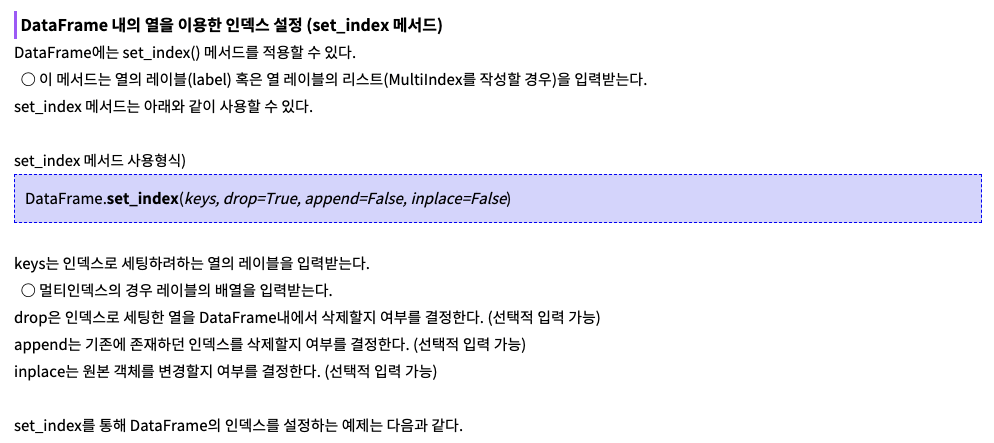

In [9]:
train_target_score_df.set_index(keys='id', inplace=True)
train_target_score_df = train_target_score_df['target'].map({'home': 0, 'draw': 1, 'away': 2})
#label encoding 진행!
train_target_score_df.head()

id
11906497    2
11984383    0
11983301    1
11983471    2
11883005    0
Name: target, dtype: int64

### 그전에 historical data 정리본
Historical columns
Historical columns contain the key world history and are indexed with numbers from 1 to 10 for the last 10 matches played by the two teams. The number 1 means the most recent while 10 is the oldest. Note that the historical matches can have been played in different leagues. For instance home_team_history_match_date_1 is the date of the last match played by the home team while home_team_history_match_date_2 is two matches ago. Another example, home_team_history_is_play_home_3 tells you if the team played home 3 matches ago and home_team_history_opponent_rating_3 what was the opponent rating.

- Historical home team features

    - home_team_history_match_date_{i} - The date of the last i-th match played by Home team.
    - home_team_history_is_play_home_{i} - If 1, the Home team played home.
    - home_team_history_is_cup_{i} - If 1, the match was a cup competition.
    - home_team_history_goal_{i} - The number of goals scored by the Home team on its last i-th match.
    - home_team_history_opponent_goal_{i} - The number of goals conceded by the Home team on its last i-th match.
    - home_team_history_rating_{i} - The rating of the Home team on its last i-th match (pre match rating).
    - home_team_history_opponent_rating_{i} - The rating of the opponent team on Home team last i-th match (pre match rating).
    - home_team_history_coach_{i} - The coach id of the Home team on its last i-th match.
    - home_team_history_league_id_{i} - The league name id by the Home team on its last i-th match.

- Historical away team features

    - away_team_history_match_date_{i} - The date of the last i-th match played by Away team.
    - away_team_history_is_play_home_{i} - If 1, the Away team played home.
    - away_team_history_is_cup_{i} - If 1, the match was a cup competition.
    - away_team_history_goal_{i} - The number of goals scored by the Away team on its last i-th match.
    - away_team_history_opponent_goal_{i} - The number of goals conceded by the Away team on its last i-th match.
    - away_team_history_rating_{i} - The rating of the Away team on its last i-th match (pre match rating).
    - away_team_history_opponent_rating_{i} - The rating of the opponent team on Away team last i-th match (pre match rating).
    - away_team_history_coach_{i} - The coach id of the Away team on its last i-th match.
    - away_team_history_league_id_{i} - The league name id played by the Away on its last i-th match.


### 이제 우리가 관심있는 feature를 설정해야함
- ex : rating 이나 goals

In [10]:
target_columns = 'home_team_history_coach'

cols = []

for col in train_df.filter(regex=target_columns, axis=1).columns:
    cols.append(col)

print(cols)


['home_team_history_coach_1', 'home_team_history_coach_2', 'home_team_history_coach_3', 'home_team_history_coach_4', 'home_team_history_coach_5', 'home_team_history_coach_6', 'home_team_history_coach_7', 'home_team_history_coach_8', 'home_team_history_coach_9', 'home_team_history_coach_10']


In [11]:
train_target_score_df.head()
# train 데이터에서 coach id를 찾아 train_target_score파일에서 매칭 시킨다!!

id
11906497    2
11984383    0
11983301    1
11983471    2
11883005    0
Name: target, dtype: int64

<AxesSubplot:>

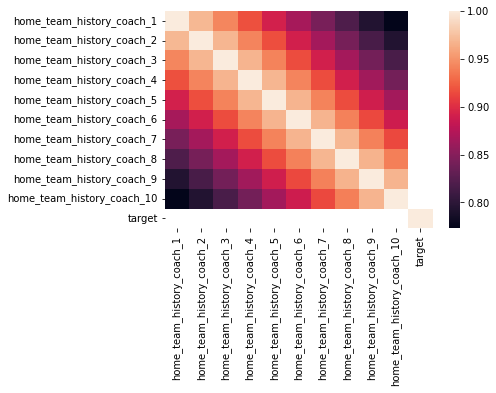

In [12]:
# 상관관계 찾는법 : delftstack.com/ko/api/python-pandas/pandas-dataframe-dataframe.corr-function/
import seaborn as sns
correlation = pd.concat([train_df[cols],train_target_score_df],axis=1).corr()
sns.heatmap(correlation)

In [13]:
train_df.head()
# print(train_df.shape) --> (110938, 189)

,id,target,home_team_name,away_team_name,match_date,league_name,league_id,is_cup,home_team_coach_id,away_team_coach_id,...,away_team_history_league_id_1,away_team_history_league_id_2,away_team_history_league_id_3,away_team_history_league_id_4,away_team_history_league_id_5,away_team_history_league_id_6,away_team_history_league_id_7,away_team_history_league_id_8,away_team_history_league_id_9,away_team_history_league_id_10
0,11906497,away,Newell's Old Boys,River Plate,2019-12-01 00:45:00,Superliga,636,False,468196.0,468200.0,...,1122.0,642.0,636.0,636.0,636.0,1122.0,636.0,642.0,636.0,1122.0
1,11984383,home,Real Estelí,Deportivo Las Sabanas,2019-12-01 01:00:00,Primera Division,752,False,516788.0,22169161.0,...,752.0,752.0,752.0,752.0,752.0,752.0,752.0,752.0,752.0,752.0
2,11983301,draw,UPNFM,Marathón,2019-12-01 01:00:00,Liga Nacional,734,False,2510608.0,456313.0,...,734.0,734.0,734.0,734.0,734.0,734.0,734.0,734.0,734.0,734.0
3,11983471,away,León,Morelia,2019-12-01 01:00:00,Liga MX,743,False,1552508.0,465797.0,...,743.0,743.0,743.0,743.0,743.0,743.0,743.0,743.0,746.0,743.0
4,11883005,home,Cobán Imperial,Iztapa,2019-12-01 01:00:00,Liga Nacional,705,False,429958.0,426870.0,...,705.0,705.0,705.0,705.0,705.0,705.0,705.0,705.0,705.0,705.0


### Feature engineering


In [14]:
#label만 먼저 자름
train_df_target = train_df['target']
train_df.drop(['target'],axis=1,inplace=True)
train_df.head()

,id,home_team_name,away_team_name,match_date,league_name,league_id,is_cup,home_team_coach_id,away_team_coach_id,home_team_history_match_date_1,...,away_team_history_league_id_1,away_team_history_league_id_2,away_team_history_league_id_3,away_team_history_league_id_4,away_team_history_league_id_5,away_team_history_league_id_6,away_team_history_league_id_7,away_team_history_league_id_8,away_team_history_league_id_9,away_team_history_league_id_10
0,11906497,Newell's Old Boys,River Plate,2019-12-01 00:45:00,Superliga,636,False,468196.0,468200.0,2019-11-26 00:10:00,...,1122.0,642.0,636.0,636.0,636.0,1122.0,636.0,642.0,636.0,1122.0
1,11984383,Real Estelí,Deportivo Las Sabanas,2019-12-01 01:00:00,Primera Division,752,False,516788.0,22169161.0,2019-11-27 21:00:00,...,752.0,752.0,752.0,752.0,752.0,752.0,752.0,752.0,752.0,752.0
2,11983301,UPNFM,Marathón,2019-12-01 01:00:00,Liga Nacional,734,False,2510608.0,456313.0,2019-11-28 01:15:00,...,734.0,734.0,734.0,734.0,734.0,734.0,734.0,734.0,734.0,734.0
3,11983471,León,Morelia,2019-12-01 01:00:00,Liga MX,743,False,1552508.0,465797.0,2019-11-28 01:00:00,...,743.0,743.0,743.0,743.0,743.0,743.0,743.0,743.0,746.0,743.0
4,11883005,Cobán Imperial,Iztapa,2019-12-01 01:00:00,Liga Nacional,705,False,429958.0,426870.0,2019-11-27 18:00:00,...,705.0,705.0,705.0,705.0,705.0,705.0,705.0,705.0,705.0,705.0


In [15]:
row_train = train_df.shape[0]
print(row_train)

110938


In [16]:
print(test_df.shape)

(72711, 189)


In [17]:
all_data = pd.concat((train_df,test_df))#열로 합침 : 위에 train, 밑에 test
print(all_data.shape)

(183649, 189)


In [18]:
all_data.head()

,id,home_team_name,away_team_name,match_date,league_name,league_id,is_cup,home_team_coach_id,away_team_coach_id,home_team_history_match_date_1,...,away_team_history_league_id_1,away_team_history_league_id_2,away_team_history_league_id_3,away_team_history_league_id_4,away_team_history_league_id_5,away_team_history_league_id_6,away_team_history_league_id_7,away_team_history_league_id_8,away_team_history_league_id_9,away_team_history_league_id_10
0,11906497,Newell's Old Boys,River Plate,2019-12-01 00:45:00,Superliga,636,False,468196.0,468200.0,2019-11-26 00:10:00,...,1122.0,642.0,636.0,636.0,636.0,1122.0,636.0,642.0,636.0,1122.0
1,11984383,Real Estelí,Deportivo Las Sabanas,2019-12-01 01:00:00,Primera Division,752,False,516788.0,22169161.0,2019-11-27 21:00:00,...,752.0,752.0,752.0,752.0,752.0,752.0,752.0,752.0,752.0,752.0
2,11983301,UPNFM,Marathón,2019-12-01 01:00:00,Liga Nacional,734,False,2510608.0,456313.0,2019-11-28 01:15:00,...,734.0,734.0,734.0,734.0,734.0,734.0,734.0,734.0,734.0,734.0
3,11983471,León,Morelia,2019-12-01 01:00:00,Liga MX,743,False,1552508.0,465797.0,2019-11-28 01:00:00,...,743.0,743.0,743.0,743.0,743.0,743.0,743.0,743.0,746.0,743.0
4,11883005,Cobán Imperial,Iztapa,2019-12-01 01:00:00,Liga Nacional,705,False,429958.0,426870.0,2019-11-27 18:00:00,...,705.0,705.0,705.0,705.0,705.0,705.0,705.0,705.0,705.0,705.0


- 이젠 필요없는 feature을 지우자.

In [19]:
all_data.drop(['home_team_name','away_team_name','league_name'],axis=1,inplace=True)
all_data.drop(all_data.filter(regex='date').columns, axis=1, inplace = True)
all_data.drop(all_data.filter(regex='coach').columns, axis=1, inplace = True)
all_data.head()

,id,league_id,is_cup,home_team_history_is_play_home_1,home_team_history_is_play_home_2,home_team_history_is_play_home_3,home_team_history_is_play_home_4,home_team_history_is_play_home_5,home_team_history_is_play_home_6,home_team_history_is_play_home_7,...,away_team_history_league_id_1,away_team_history_league_id_2,away_team_history_league_id_3,away_team_history_league_id_4,away_team_history_league_id_5,away_team_history_league_id_6,away_team_history_league_id_7,away_team_history_league_id_8,away_team_history_league_id_9,away_team_history_league_id_10
0,11906497,636,False,0.0,1.0,0.0,1.0,0.0,1.0,0.0,...,1122.0,642.0,636.0,636.0,636.0,1122.0,636.0,642.0,636.0,1122.0
1,11984383,752,False,1.0,0.0,1.0,0.0,1.0,1.0,0.0,...,752.0,752.0,752.0,752.0,752.0,752.0,752.0,752.0,752.0,752.0
2,11983301,734,False,0.0,1.0,0.0,1.0,0.0,1.0,0.0,...,734.0,734.0,734.0,734.0,734.0,734.0,734.0,734.0,734.0,734.0
3,11983471,743,False,0.0,0.0,1.0,1.0,0.0,1.0,0.0,...,743.0,743.0,743.0,743.0,743.0,743.0,743.0,743.0,746.0,743.0
4,11883005,705,False,0.0,1.0,0.0,1.0,0.0,1.0,0.0,...,705.0,705.0,705.0,705.0,705.0,705.0,705.0,705.0,705.0,705.0


In [20]:
all_data.shape
# column이 188->142로 줄음

(183649, 143)

In [21]:
# 숫자로 나타나지 않은 is_cup을 0 or 1로 바꾸기
all_data['is_cup'] = all_data['is_cup'].map({False: 0, True: 1})
all_data.head()


,id,league_id,is_cup,home_team_history_is_play_home_1,home_team_history_is_play_home_2,home_team_history_is_play_home_3,home_team_history_is_play_home_4,home_team_history_is_play_home_5,home_team_history_is_play_home_6,home_team_history_is_play_home_7,...,away_team_history_league_id_1,away_team_history_league_id_2,away_team_history_league_id_3,away_team_history_league_id_4,away_team_history_league_id_5,away_team_history_league_id_6,away_team_history_league_id_7,away_team_history_league_id_8,away_team_history_league_id_9,away_team_history_league_id_10
0,11906497,636,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,...,1122.0,642.0,636.0,636.0,636.0,1122.0,636.0,642.0,636.0,1122.0
1,11984383,752,0.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,...,752.0,752.0,752.0,752.0,752.0,752.0,752.0,752.0,752.0,752.0
2,11983301,734,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,...,734.0,734.0,734.0,734.0,734.0,734.0,734.0,734.0,734.0,734.0
3,11983471,743,0.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,...,743.0,743.0,743.0,743.0,743.0,743.0,743.0,743.0,746.0,743.0
4,11883005,705,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,...,705.0,705.0,705.0,705.0,705.0,705.0,705.0,705.0,705.0,705.0


- missing value 어떻게 처리할까..?

In [33]:
all_data.isnull().sum()

league_id                               0
is_cup                                  1
home_team_history_is_play_home_1     1657
home_team_history_is_play_home_2     3533
home_team_history_is_play_home_3     5451
                                    ...  
away_team_history_league_id_6       12088
away_team_history_league_id_7       14196
away_team_history_league_id_8       16259
away_team_history_league_id_9       18408
away_team_history_league_id_10      20524
Length: 142, dtype: int64

In [22]:
(all_data.isnull().sum() / len(all_data)) * 100
# print(len((all_data.isnull().sum() / len(all_data)) * 100))

id                                   0.000000
league_id                            0.000000
is_cup                               0.000545
home_team_history_is_play_home_1     0.902265
home_team_history_is_play_home_2     1.923779
                                      ...    
away_team_history_league_id_6        6.582121
away_team_history_league_id_7        7.729963
away_team_history_league_id_8        8.853302
away_team_history_league_id_9       10.023469
away_team_history_league_id_10      11.175667
Length: 143, dtype: float64

In [23]:
a = (all_data.isnull().sum() / len(all_data)) * 100
a = a.drop(a[a==0].index).sort_values(ascending=False)[:30]
missing_data = pd.DataFrame({'Missing Ratio':a})
missing_data


,Missing Ratio
away_team_history_is_cup_10,11.564452
away_team_history_opponent_rating_10,11.184923
away_team_history_rating_10,11.184923
away_team_history_league_id_10,11.175667
away_team_history_opponent_goal_10,11.175667
away_team_history_goal_10,11.175667
away_team_history_is_play_home_10,11.175667
home_team_history_is_cup_10,11.082010
home_team_history_opponent_rating_10,10.697581
home_team_history_rating_10,10.697581


In [24]:
print(len(a))

30


- is_cup : 0으로 채운다. 0이 대부분이므로
- rating : 평균값으로
- ~is_play_home : 0.5로 채움
- ~goal : 평균값으로

In [25]:
# is_cup
for col in all_data.filter(regex='is_cup',axis=1).columns:
    all_data[col] = all_data[col].fillna(0)

# rating
for col in all_data.filter(regex='rating',axis=1).columns:
    all_data[col] = all_data[col].fillna(all_data[col].mean())

# is_play_home
for col in all_data.filter(regex='is_play_home',axis=1).columns:
    all_data[col] = all_data[col].fillna(0.5)

# league
for col in all_data.filter(regex='league', axis=1).columns:
    all_data[col] = all_data[col].fillna(0)
    
# goal
for col in all_data.filter(regex='goal', axis=1).columns:
    all_data[col] = all_data[col].fillna(all_data[col].mean())


In [26]:
# 다시 확인해보자
a = (all_data.isnull().sum() / len(all_data)) * 100
a = a.drop(a[a==0].index).sort_values(ascending=False)[:30]
missing_data = pd.DataFrame({'Missing Ratio':a})
missing_data
# 다 지움

,Missing Ratio


In [27]:
a = a.drop(a[a==0].index).sort_values(ascending=False)
a

Series([], dtype: float64)

- 이제 다시 train,test분리하자

In [28]:
row_train = train_df.shape[0]

train_df = all_data[:row_train]
test_df = all_data[row_train:]
print(train_df.shape,test_df.shape)

(110938, 143) (72711, 143)


In [29]:
train_df.head()

,id,league_id,is_cup,home_team_history_is_play_home_1,home_team_history_is_play_home_2,home_team_history_is_play_home_3,home_team_history_is_play_home_4,home_team_history_is_play_home_5,home_team_history_is_play_home_6,home_team_history_is_play_home_7,...,away_team_history_league_id_1,away_team_history_league_id_2,away_team_history_league_id_3,away_team_history_league_id_4,away_team_history_league_id_5,away_team_history_league_id_6,away_team_history_league_id_7,away_team_history_league_id_8,away_team_history_league_id_9,away_team_history_league_id_10
0,11906497,636,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,...,1122.0,642.0,636.0,636.0,636.0,1122.0,636.0,642.0,636.0,1122.0
1,11984383,752,0.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,...,752.0,752.0,752.0,752.0,752.0,752.0,752.0,752.0,752.0,752.0
2,11983301,734,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,...,734.0,734.0,734.0,734.0,734.0,734.0,734.0,734.0,734.0,734.0
3,11983471,743,0.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,...,743.0,743.0,743.0,743.0,743.0,743.0,743.0,743.0,746.0,743.0
4,11883005,705,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,...,705.0,705.0,705.0,705.0,705.0,705.0,705.0,705.0,705.0,705.0


### Deciding Model

In [30]:
#우선 까먹었으니 train_target_score_df.values 출력해보자
train_target_score_df.head()

id
11906497    2
11984383    0
11983301    1
11983471    2
11883005    0
Name: target, dtype: int64

In [31]:
# pandas -> numpy
x = train_df.to_numpy() 
y = train_target_score_df.to_numpy()
print(x.shape,y.shape)

(110938, 143) (110938,)


- 110938 * 0.2 = 22187.6

In [32]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size =0.2, random_state=42, stratify=y, shuffle=True)

In [33]:
print("train_data shape : (%d, %d) "%(x_train.shape))
print("valid_data shape : (%d, %d) "%(x_test.shape)) #valid
print('train_data label : (%d, )'%(y_train.shape) )
print('train_data label : (%d, )'%(y_test.shape) )

train_data shape : (88750, 143) 
valid_data shape : (22188, 143) 
train_data label : (88750, )
train_data label : (22188, )


### LighGBM

In [37]:
import lightgbm as lgb
# https://greatjoy.tistory.com/72
parameters = {'objective': 'multiclass', 
          'num_class': 3, 
          'metric': 'multi_logloss', 
          'verbosity': -1, 
          'num_leaves': 10, 
          'learning_rate': 0.03, 
          'feature_fraction': 0.7, 
          'bagging_fraction': 0.6, 
          'bagging_freq': 4, 
          'feature_pre_filter': False, 
          'lambda_l1': 0,
          'lambda_l2': 0, 
          'min_data_in_leaf': 25, 
          'min_child_samples': 20, 
          'num_iterations': 5000, 
          'early_stopping_round': 100}
kfold = StratifiedKFold(n_splits=10, random_state=1, shuffle=True).split(x_train,y_train)

scores = []
models = []

for k, (train,test) in enumerate(kfold):
    x_train_lgb = lgb.Dataset(x_train[train],y_train[train])
    x_valid_lgb = lgb.Dataset(x_train[test],y_train[test])

    model = lgb.train(parameters, x_train_lgb, valid_sets=x_valid_lgb, verbose_eval=100, num_boost_round=10000, early_stopping_rounds=100)

    pred = model.predict(x_train[test], num_iteration=model.best_iteration)

    score = log_loss(y_train[test], pred)
    scores.append(score)

    print('Fold: %3d, loss : %.3f'%(k+1, score))

    models.append(model)

print('mean loss : %.3f, std : %.3f'%(np.mean(scores),np.std(scores)))



/home/jiwon/anaconda3/envs/football/lib/python3.8/site-packages/lightgbm/engine.py:148: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  _log_warning("Found `{}` in params. Will use it instead of argument".format(alias))
/home/jiwon/anaconda3/envs/football/lib/python3.8/site-packages/lightgbm/engine.py:153: UserWarning: Found `early_stopping_round` in params. Will use it instead of argument
  _log_warning("Found `{}` in params. Will use it instead of argument".format(alias))


[LightGBM] [Warning] min_data_in_leaf is set=25, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=25
Training until validation scores don't improve for 100 rounds
[100]	valid_0's multi_logloss: 1.02755
[200]	valid_0's multi_logloss: 1.01979
[300]	valid_0's multi_logloss: 1.01686
[400]	valid_0's multi_logloss: 1.01579
[500]	valid_0's multi_logloss: 1.01517
[600]	valid_0's multi_logloss: 1.01514
Early stopping, best iteration is:
[539]	valid_0's multi_logloss: 1.01492
Fold:   1, loss : 1.015
[LightGBM] [Warning] min_data_in_leaf is set=25, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=25


/home/jiwon/anaconda3/envs/football/lib/python3.8/site-packages/lightgbm/engine.py:148: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  _log_warning("Found `{}` in params. Will use it instead of argument".format(alias))
/home/jiwon/anaconda3/envs/football/lib/python3.8/site-packages/lightgbm/engine.py:153: UserWarning: Found `early_stopping_round` in params. Will use it instead of argument
  _log_warning("Found `{}` in params. Will use it instead of argument".format(alias))


Training until validation scores don't improve for 100 rounds
[100]	valid_0's multi_logloss: 1.02105
[200]	valid_0's multi_logloss: 1.01254
[300]	valid_0's multi_logloss: 1.00918
[400]	valid_0's multi_logloss: 1.00771
[500]	valid_0's multi_logloss: 1.00693
[600]	valid_0's multi_logloss: 1.00618
[700]	valid_0's multi_logloss: 1.00571
[800]	valid_0's multi_logloss: 1.00561
Early stopping, best iteration is:
[775]	valid_0's multi_logloss: 1.00558
Fold:   2, loss : 1.006


/home/jiwon/anaconda3/envs/football/lib/python3.8/site-packages/lightgbm/engine.py:148: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  _log_warning("Found `{}` in params. Will use it instead of argument".format(alias))
/home/jiwon/anaconda3/envs/football/lib/python3.8/site-packages/lightgbm/engine.py:153: UserWarning: Found `early_stopping_round` in params. Will use it instead of argument
  _log_warning("Found `{}` in params. Will use it instead of argument".format(alias))


[LightGBM] [Warning] min_data_in_leaf is set=25, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=25
Training until validation scores don't improve for 100 rounds
[100]	valid_0's multi_logloss: 1.02331
[200]	valid_0's multi_logloss: 1.01565
[300]	valid_0's multi_logloss: 1.01379
[400]	valid_0's multi_logloss: 1.01286
[500]	valid_0's multi_logloss: 1.01206
[600]	valid_0's multi_logloss: 1.01187
Early stopping, best iteration is:
[583]	valid_0's multi_logloss: 1.01161
Fold:   3, loss : 1.012
[LightGBM] [Warning] min_data_in_leaf is set=25, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=25


/home/jiwon/anaconda3/envs/football/lib/python3.8/site-packages/lightgbm/engine.py:148: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  _log_warning("Found `{}` in params. Will use it instead of argument".format(alias))
/home/jiwon/anaconda3/envs/football/lib/python3.8/site-packages/lightgbm/engine.py:153: UserWarning: Found `early_stopping_round` in params. Will use it instead of argument
  _log_warning("Found `{}` in params. Will use it instead of argument".format(alias))


Training until validation scores don't improve for 100 rounds
[100]	valid_0's multi_logloss: 1.02328
[200]	valid_0's multi_logloss: 1.01524
[300]	valid_0's multi_logloss: 1.01291
[400]	valid_0's multi_logloss: 1.01197
[500]	valid_0's multi_logloss: 1.012
Early stopping, best iteration is:
[444]	valid_0's multi_logloss: 1.01183
Fold:   4, loss : 1.012
[LightGBM] [Warning] min_data_in_leaf is set=25, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=25


/home/jiwon/anaconda3/envs/football/lib/python3.8/site-packages/lightgbm/engine.py:148: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  _log_warning("Found `{}` in params. Will use it instead of argument".format(alias))
/home/jiwon/anaconda3/envs/football/lib/python3.8/site-packages/lightgbm/engine.py:153: UserWarning: Found `early_stopping_round` in params. Will use it instead of argument
  _log_warning("Found `{}` in params. Will use it instead of argument".format(alias))


Training until validation scores don't improve for 100 rounds
[100]	valid_0's multi_logloss: 1.02737
[200]	valid_0's multi_logloss: 1.01987
[300]	valid_0's multi_logloss: 1.01752
[400]	valid_0's multi_logloss: 1.01678
[500]	valid_0's multi_logloss: 1.01659
Early stopping, best iteration is:
[475]	valid_0's multi_logloss: 1.01645
Fold:   5, loss : 1.016
[LightGBM] [Warning] min_data_in_leaf is set=25, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=25


/home/jiwon/anaconda3/envs/football/lib/python3.8/site-packages/lightgbm/engine.py:148: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  _log_warning("Found `{}` in params. Will use it instead of argument".format(alias))
/home/jiwon/anaconda3/envs/football/lib/python3.8/site-packages/lightgbm/engine.py:153: UserWarning: Found `early_stopping_round` in params. Will use it instead of argument
  _log_warning("Found `{}` in params. Will use it instead of argument".format(alias))


Training until validation scores don't improve for 100 rounds
[100]	valid_0's multi_logloss: 1.02412
[200]	valid_0's multi_logloss: 1.01656
[300]	valid_0's multi_logloss: 1.01435
[400]	valid_0's multi_logloss: 1.01338
[500]	valid_0's multi_logloss: 1.01308
[600]	valid_0's multi_logloss: 1.01309
Early stopping, best iteration is:
[519]	valid_0's multi_logloss: 1.01298
Fold:   6, loss : 1.013
[LightGBM] [Warning] min_data_in_leaf is set=25, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=25


/home/jiwon/anaconda3/envs/football/lib/python3.8/site-packages/lightgbm/engine.py:148: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  _log_warning("Found `{}` in params. Will use it instead of argument".format(alias))
/home/jiwon/anaconda3/envs/football/lib/python3.8/site-packages/lightgbm/engine.py:153: UserWarning: Found `early_stopping_round` in params. Will use it instead of argument
  _log_warning("Found `{}` in params. Will use it instead of argument".format(alias))


Training until validation scores don't improve for 100 rounds
[100]	valid_0's multi_logloss: 1.0209
[200]	valid_0's multi_logloss: 1.01205
[300]	valid_0's multi_logloss: 1.00896
[400]	valid_0's multi_logloss: 1.00797
[500]	valid_0's multi_logloss: 1.00729
[600]	valid_0's multi_logloss: 1.00733
Early stopping, best iteration is:
[513]	valid_0's multi_logloss: 1.00724
Fold:   7, loss : 1.007
[LightGBM] [Warning] min_data_in_leaf is set=25, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=25


/home/jiwon/anaconda3/envs/football/lib/python3.8/site-packages/lightgbm/engine.py:148: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  _log_warning("Found `{}` in params. Will use it instead of argument".format(alias))
/home/jiwon/anaconda3/envs/football/lib/python3.8/site-packages/lightgbm/engine.py:153: UserWarning: Found `early_stopping_round` in params. Will use it instead of argument
  _log_warning("Found `{}` in params. Will use it instead of argument".format(alias))


Training until validation scores don't improve for 100 rounds
[100]	valid_0's multi_logloss: 1.024
[200]	valid_0's multi_logloss: 1.0164
[300]	valid_0's multi_logloss: 1.01419
[400]	valid_0's multi_logloss: 1.01325
[500]	valid_0's multi_logloss: 1.01273
[600]	valid_0's multi_logloss: 1.01268
Early stopping, best iteration is:
[568]	valid_0's multi_logloss: 1.01254
Fold:   8, loss : 1.013
[LightGBM] [Warning] min_data_in_leaf is set=25, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=25


/home/jiwon/anaconda3/envs/football/lib/python3.8/site-packages/lightgbm/engine.py:148: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  _log_warning("Found `{}` in params. Will use it instead of argument".format(alias))
/home/jiwon/anaconda3/envs/football/lib/python3.8/site-packages/lightgbm/engine.py:153: UserWarning: Found `early_stopping_round` in params. Will use it instead of argument
  _log_warning("Found `{}` in params. Will use it instead of argument".format(alias))


Training until validation scores don't improve for 100 rounds
[100]	valid_0's multi_logloss: 1.02287
[200]	valid_0's multi_logloss: 1.01503
[300]	valid_0's multi_logloss: 1.01232
[400]	valid_0's multi_logloss: 1.0114
[500]	valid_0's multi_logloss: 1.0109
[600]	valid_0's multi_logloss: 1.01073
[700]	valid_0's multi_logloss: 1.01088
Early stopping, best iteration is:
[617]	valid_0's multi_logloss: 1.01057
Fold:   9, loss : 1.011
[LightGBM] [Warning] min_data_in_leaf is set=25, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=25


/home/jiwon/anaconda3/envs/football/lib/python3.8/site-packages/lightgbm/engine.py:148: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  _log_warning("Found `{}` in params. Will use it instead of argument".format(alias))
/home/jiwon/anaconda3/envs/football/lib/python3.8/site-packages/lightgbm/engine.py:153: UserWarning: Found `early_stopping_round` in params. Will use it instead of argument
  _log_warning("Found `{}` in params. Will use it instead of argument".format(alias))


Training until validation scores don't improve for 100 rounds
[100]	valid_0's multi_logloss: 1.02303
[200]	valid_0's multi_logloss: 1.0146
[300]	valid_0's multi_logloss: 1.01156
[400]	valid_0's multi_logloss: 1.01039
[500]	valid_0's multi_logloss: 1.00973
[600]	valid_0's multi_logloss: 1.00922
[700]	valid_0's multi_logloss: 1.00878
[800]	valid_0's multi_logloss: 1.00875
Early stopping, best iteration is:
[737]	valid_0's multi_logloss: 1.00864
Fold:  10, loss : 1.009
mean loss : 1.011, std : 0.003


In [41]:
def predict(models,x_test):

    y_pred = np.zeros((len(x_test),len(models),3))
    print(y_pred.shape)
    for fold, model in enumerate(models):
        pred1 = model.predict(x_test,num_iteration=model.best_iteration)

        y_pred[:, fold] = pred1
    y_pred = y_pred.mean(axis=1)
    return y_pred

y_pred = predict(models,x_test)
result = predict(models,x_train)

print(f'test loss = {log_loss(y_test,y_pred)}')
print(f'train loss = {log_loss(y_train,result)}')

(22188, 10, 3)
(88750, 10, 3)
test loss = 1.0115272706053595
train loss = 0.9734463008460161


### Submit prediction

In [51]:
x_submit = test_df.values

y_submit = predict(models,x_submit)
print(y_submit.shape)
print(y_submit[:,0].shape)

(72711, 10, 3)
(72711, 3)
(72711,)


In [45]:
!pwd

/home/jiwon/football


In [46]:
submission_df = pd.read_csv('./data/sample_submission.csv')

submission_df.head(5)

,id,home,draw,away
0,17761448,0.333,0.333,0.333
1,17695487,0.333,0.333,0.333
2,17715496,0.333,0.333,0.333
3,17715493,0.333,0.333,0.333
4,17715492,0.333,0.333,0.333


In [ ]:
submission_df['home'] = pd.DataFrame(y_submit[:, 0])
submission_df['draw'] = pd.DataFrame(y_submit[:, 1])
submission_df['away'] = pd.DataFrame(y_submit[:, 2])
submission_df.head()

In [49]:
submission_df.to_csv('submission.csv',index=False,header=True)

In [50]:
submission_df

,id,home,draw,away
0,17761448,0.333,0.333,0.333
1,17695487,0.333,0.333,0.333
2,17715496,0.333,0.333,0.333
3,17715493,0.333,0.333,0.333
4,17715492,0.333,0.333,0.333
...,...,...,...,...
72706,18450246,0.333,0.333,0.333
72707,18164889,0.333,0.333,0.333
72708,18449018,0.333,0.333,0.333
72709,17958831,0.333,0.333,0.333


### XGBoost

In [40]:
import xgboost as xgb
# https://wooono.tistory.com/97
xgb_train = xgb.DMatrix(x_train,y_train)
xgb_test = xgb.DMatrix(x_test,y_test)

parameters1 = {
    'booster': 'gbtree',
    'max_depth': 5, 
    'verbosity ' : -1,
    'learning_rate': 0.025,
    'min_split_loss': 0.01,
    'min_child_weight': 5,
    'subsample': 0.8,
    'colsample_bytree': 0.25,
    'alpha': 2,
    'lambda': 3,
    'objective': 'multi:softprob',
    'num_class': 3,
    'eval_metric':'mlogloss'
}

num_round = 10000
evallist = [(xgb_train, 'train'), (xgb_test, 'eval')]

model1 = xgb.train(parameters1,x_train,num_round,evallist,early_stopping_rounds=20)

TypeError: ('invalid cache item: ndarray', [array([[1.6887811e+07, 7.4900000e+02, 0.0000000e+00, ..., 7.4900000e+02,
        7.4900000e+02, 7.4900000e+02],
       [1.1891827e+07, 8.0600000e+02, 0.0000000e+00, ..., 8.0600000e+02,
        8.0600000e+02, 8.0600000e+02],
       [1.1957920e+07, 1.7570000e+03, 0.0000000e+00, ..., 1.7570000e+03,
        1.7570000e+03, 1.7570000e+03],
       ...,
       [1.1996110e+07, 7.0500000e+02, 0.0000000e+00, ..., 7.0500000e+02,
        7.0500000e+02, 7.0500000e+02],
       [1.1868076e+07, 2.4400000e+02, 0.0000000e+00, ..., 2.4400000e+02,
        1.1010000e+03, 2.4400000e+02],
       [1.1938027e+07, 1.2820000e+03, 0.0000000e+00, ..., 1.2820000e+03,
        1.2820000e+03, 1.2820000e+03]]), <xgboost.core.DMatrix object at 0x7f00174920a0>, <xgboost.core.DMatrix object at 0x7f0066211dc0>])